In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier, Lasso
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC

from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle

from sklearn.tree import DecisionTreeClassifier


In [4]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [5]:
mrna_df =pd.read_csv('/Users/cp/Documents/dsi/capstone2/capstone2/data/capstone2.mrn_df2.csv')
df = pd.read_csv('/Users/cp/Documents/dsi/capstone2/capstone2/data/METABRIC_RNA_Mutation.csv')


/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
death_from_dict = {
    'Living':0
    ,'Died of Other Causes':0
    ,'Died of Disease':1
}
df.replace(death_from_dict, inplace =True)
mrna_df['death_from_cancer'] = df.death_from_cancer



In [7]:
mrna_df.death_from_cancer.fillna(0, inplace = True)

In [8]:
y = mrna_df.pop('death_from_cancer')
X = mrna_df

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify = y)
# X_train2, X_test, y_train2, y_test = train_test_split(X_train.copy(), y_train.copy(), test_size=0.10, random_state=1)

In [46]:
# gradient_boosting_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
#                          ,'max_depth': [2, 4, 8]
#                          ,'subsample': [0.25, 0.5, 0.75, 1.0]
#                          ,'min_samples_leaf': [1, 2, 4]
#                          ,'max_features': ['sqrt', 'log2', None]
#                          ,'n_estimators': [5,10,25,50,100,200]}

# random_forest_grid = {'max_depth': [2, 4, 8]
#                      ,'max_features': ['sqrt', 'log2', None]
#                      ,'min_samples_leaf': [1, 2, 4]
#                      ,'min_samples_split': [2, 4]
#                      ,'bootstrap': [True, False]
#                      ,'n_estimators': [5,10,25,50,100,200]}

logistic_regression_grid = {'Cs':[5, 50]
#                        ,'cv':[4]
                       ,'solver':['liblinear']#'lbfgs',
#                        ,'max_iter' : [50]
                       ,'class_weight':['balanced']
                       ,'penalty':['l1'] #, 'l2', 'elasticnet'

                       }
# svm_grid = {'C':[0.5, 1, 2]

#                        ,'kernel':['rbf', 'liblinear']}

# ada_grid = {'base_estimator': [DecisionTreeClassifier(class_weight='balanced')], \
#                   'n_estimators': [100, 250], \
#                   'learning_rate': [0.1, 0.25]}


# sgd_grid = {'loss': ['hinge', 'log', 'modified_huber'], \
#                       'alpha': [0.001, 0.01], \
#                       'penalty': ['l1'], \
#                       'max_iter': [5, 10, 25], \
#                       'class_weight': ['balanced']}



In [47]:


logistic_randomsearch = RandomizedSearchCV(LogisticRegressionCV()
                                              ,logistic_regression_grid
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

# svm_randomsearch = RandomizedSearchCV(SVC(gamma = 'auto')
#                                               ,svm_grid
#                                               ,n_jobs=-1
#                                               ,verbose=False
#                                               ,scoring='roc_auc')

# gradient_randomsearch = RandomizedSearchCV(GradientBoostingClassifier()
#                                           ,gradient_boosting_grid
#                                           ,n_jobs=-1
#                                           ,verbose=False
#                                           ,scoring='roc_auc')

# random_foreset_randomsearch = RandomizedSearchCV(RandomForestClassifier()
#                                                 ,random_forest_grid
#                                                 ,n_jobs=-1
#                                                 ,verbose=False
#                                                 ,scoring='roc_auc')

# ada_randomsearch = RandomizedSearchCV(AdaBoostClassifier()
#                                                 ,ada_grid
#                                                 ,n_jobs=-1
#                                                 ,verbose=False
#                                                 ,scoring='roc_auc')

# SGD_randomsearch = RandomizedSearchCV(SGDClassifier()
#                                                 ,sgd_grid
#                                                 ,n_jobs=-1
#                                                 ,verbose=False
#                                                 ,scoring='roc_auc')





In [48]:
logistic_randomsearch.fit(X_train, y_train)
print(f"Best logistic Parameters: {logistic_randomsearch.best_params_}")
print(f"Best logistic Model: {logistic_randomsearch.best_estimator_}")
print(f"Best logistic Score: {logistic_randomsearch.best_score_:.4f}")

# svm_randomsearch.fit(X_train, y_train)
# print(f"Best svm Parameters: {svm_randomsearch.best_params_}")
# print(f"Best svm Model: {svm_randomsearch.best_estimator_}")
# print(f"Best svm Score: {svm_randomsearch.best_score_:.4f}")

# gradient_randomsearch.fit(X_train, y_train)
# print(f"Best Gradient Parameters: {gradient_randomsearch.best_params_}")
# print(f"Best Gradient Model: {gradient_randomsearch.best_estimator_}")
# print(f"Best Gradient Score: {gradient_randomsearch.best_score_:.4f}")

# random_foreset_randomsearch.fit(X_train, y_train)
# print(f"Best Random Forest Parameters: {random_foreset_randomsearch.best_params_}")
# print(f"Best Random Forest Model: {random_foreset_randomsearch.best_estimator_}")
# print(f"Best Random Forest Score: {random_foreset_randomsearch.best_score_:.4f}")


# ada_randomsearch.fit(X_train, y_train)
# print(f"Best Random adaboost Parameters: {ada_randomsearch.best_params_}")
# print(f"Best Random adaboost Model: {ada_randomsearch.best_estimator_}")
# print(f"Best Random adaboost Score: {ada_randomsearch.best_score_:.4f}")

# SGD_randomsearch.fit(X_train, y_train)
# print(f"Best Random SGD Parameters: {SGD_randomsearch.best_params_}")
# print(f"Best Random SGD Model: {SGD_randomsearch.best_estimator_}")
# print(f"Best Random SGD Score: {SGD_randomsearch.best_score_:.4f}")




/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best logistic Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'class_weight': 'balanced', 'Cs': 5}
Best logistic Model: LogisticRegressionCV(Cs=5, class_weight='balanced', penalty='l1',
                     solver='liblinear')
Best logistic Score: 0.5000


In [49]:
logistic_best_model = logistic_randomsearch.best_estimator_
logistic_y_hats = logistic_best_model.predict(X_test)
print(f"Gradient ROC Score = {roc_auc_score(y_test, logistic_y_hats):.4f}")

# svm_best_model = svm_randomsearch.best_estimator_
# svm_y_hats = logistic_best_model.predict(X_test)
# print(f"Gradient ROC Score = {roc_auc_score(y_test, svm_y_hats):.4f}")

# gradient_best_model = gradient_randomsearch.best_estimator_
# gy_hats = gradient_best_model.predict(X_test)
# print(f"Gradient ROC Score = {roc_auc_score(y_test, gy_hats):.4f}")

# random_forest_best_model = random_foreset_randomsearch.best_estimator_
# ry_hats = random_forest_best_model.predict(X_test)
# print(f"Random Forest ROC Score = {roc_auc_score(y_test, ry_hats):.4f}")




# ada_boost_best_model = ada_randomsearch.best_estimator_
# ada_y_hats = ada_boost_best_model.predict(X_test)
# print(f"Random Adaboost ROC Score = {roc_auc_score(y_test, ada_y_hats):.4f}")

# SGD_best_model = SGD_randomsearch.best_estimator_
# SGD_y_hats = SGD_best_model.predict(X_test)
# print(f"Random SGD ROC Score = {roc_auc_score(y_test, SGD_y_hats):.4f}")



Gradient ROC Score = 0.5000


In [ ]:
# lst =X_train.shape,X_train2.shape, X_test.shape, X_val.shape
# print(lst)

In [14]:
print(classification_report(y_test, logistic_y_hats))
# print(classification_report(y_test, svm_y_hats))
# print(classification_report(y_test, gy_hats))
# print(classification_report(y_test, ry_hats))
# print(classification_report(y_test, ada_y_hats))
# print(classification_report(y_test, SGD_y_hats))


              precision    recall  f1-score   support

         0.0       0.67      1.00      0.81       193
         1.0       0.00      0.00      0.00        93

    accuracy                           0.67       286
   macro avg       0.34      0.50      0.40       286
weighted avg       0.46      0.67      0.54       286



/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
print(accuracy_score(y_test, logistic_y_hats))
# print(accuracy_score(y_test, svm_y_hats))
# print(accuracy_score(y_test, gy_hats))
# print(accuracy_score(y_test, ry_hats))
# print(accuracy_score(y_test, ada_y_hats))
# print(accuracy_score(y_test, SGD_y_hats))

0.6748251748251748


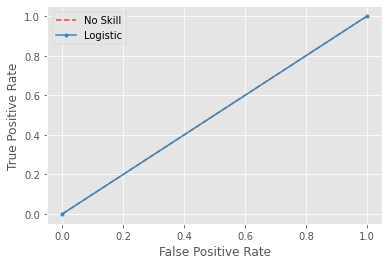

In [40]:

logistic_best_model.fit(X_train, y_train)
# predict probabilities
yhat = logistic_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()



from sklearn import metrics
# preds =logistic_best_model.predict_proba(X_test)
# tpr, tpr, thresholds = metrics.roc_curve(y_test,preds[:,1])
# print (thresholds)

# accuracy_ls = []
# for thres in thresholds:
#     y_pred = np.where(preds[:,1]>thres,1,0)
#     # Apply desired utility function to y_preds, for example accuracy.
#     accuracy_ls.append(metrics.recall_score(y_test, y_pred))
# accuracy_ls

In [ ]:
# validate_lg_y_hat = logistic_best_model.predict(X_val)
# validate_svm_y_hat = svm_best_model.predict(X_val)
# validate_gb_y_hat = gradient_best_model.predict(X_val)
# validate_rf_y_hat = random_forest_best_model.predict(X_val)
validate_ada_y_hat = ada_boost_best_model.predict(X_val)
validate_SGD_y_hat = SGD_best_model.predict(X_val)


In [ ]:
# print(accuracy_score(y_val, validate_lg_y_hat))
# print(accuracy_score(y_val, validate_svm_y_hat))
# print(accuracy_score(y_val, validate_gb_y_hat))
# print(accuracy_score(y_val, validate_rf_y_hat))
print(accuracy_score(y_val, validate_ada_y_hat))
print(accuracy_score(y_val, validate_SGD_y_hat))




In [ ]:


# print(classification_report(y_val, validate_lg_y_hat))
# print(classification_report(y_val, validate_svm_y_hat))
# print(classification_report(y_val, validate_gb_y_hat))
# print(classification_report(y_val, validate_rf_y_hat))
print(classification_report(y_val, validate_ada_y_hat))
print(classification_report(y_val, validate_SGD_y_hat))


In [ ]:
# filename = 'random_forrest_model1.sav'
# pickle.dump(random_forest_best_model, open(filename, 'wb'))

In [ ]:
# filename = 'gradient_best_model1.sav'
# pickle.dump(gradient_best_model, open(filename, 'wb'))

In [ ]:
# filename = 'svm_best_model1.sav'
# pickle.dump(svm_best_model, open(filename, 'wb'))

In [ ]:
# filename = 'logistic_best_model1.sav'
# pickle.dump(logistic_best_model, open(filename, 'wb'))

In [ ]:
pca = PCA(n_components = 0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)


In [ ]:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " features explain around 75% of the variance. From 489 features to ", k, ", not too bad.", sep='')

pca = PCA(n_components=k)
X_train.pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp)
plt.xlabel("Number of components", fontsize = 13)
plt.ylabel("Percent of Variance Explained", fontsize = 13)
# fig.suptitle('test title', fontsize=20)

plt.title("Variance explained by principle components", fontsize=18)
# plt.set_ylabel('Patient Count');
plt.savefig("PCA_component_variance.png", dpi=200)

In [ ]:
X_test.shape

In [ ]:
pca3 = PCA(n_components = 3).fit_transform(X_train)
colors = np.where(y_train==0, 'red', 'blue')
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(pca3[:, 0], pca3[:, 1], pca3[:, 2], c=colors, cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA dimensions")
ax.set_xlabel("PC1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC3")
ax.w_zaxis.set_ticklabels([])
plt.savefig("PCA_first_3_plt.png", dpi=200)
plt.show()


In [ ]:
logistic_regression_grid2 = {'Cs':[2, 5]
                       ,'cv':[2,4,8]
                       ,'solver':['lbfgs', 'liblinear']
                       ,'max_iter' : [50]
                       ,'penalty':['l1', 'l2', 'elasticnet']
                           }

In [ ]:
logistic_randomsearch2 = RandomizedSearchCV(LogisticRegressionCV()
                                              ,logistic_regression_grid2
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

In [ ]:
# logRegRidge = LogisticRegressionCV(penalty='l2', max_iter=100)
# logRegRidge.fit(X_train2, y_train2)
# print(f'Ridge Coefficients:{logRegRidge.coef_}')
    
# logReg_pred_p = logRegRidge.predict_proba(X_test)
# y_pred = logRegRidge.predict(X_test)
    
# Lasso

log_Reg_Lasso = LogisticRegressionCV(max_iter=200)
log_Reg_Lasso.fit(X_train, y_train)
print(f'Lasso Coefficients:{log_Reg_Lasso.coef_}')
    
log_Reg_Lasso_pred_p = log_Reg_Lasso.predict_proba(X_test)
y_pred = log_Reg_Lasso.predict(X_test) 








# logistic_randomsearch2.fit(X_train2, y_train2)
# print(f"Best logistic Parameters: {logistic_randomsearch2.best_params_}")
# print(f"Best logistic Model: {logistic_randomsearch2.best_estimator_}")
# print(f"Best logistic Score: {logistic_randomsearch2.best_score_:.4f}")


# # logRegRidge = LogisticRegressionCV(penalty='l2', max_iter=200)
# # logRegRidge.fit(X_train, y_train)
# print(f'LogisticRegression Coefficients:{logistic_randomsearch2.coef_}')
    
# logReg_pred_p = logistic_randomsearch2.predict_proba(X_test)
# y_pred = logistic_randomsearch2.predict(X_test)
#_______________________________________________________________________    
# Lasso

# log_Reg_Lasso = LogisticRegressionCV(max_iter=200)
# log_Reg_Lasso.fit(X_train, y_train)
# print(f'Lasso Coefficients:{log_Reg_Lasso.coef_}')
    
# log_Reg_Lasso_pred_p = log_Reg_Lasso.predict_proba(X_test)
# y_pred = log_Reg_Lasso.predict(X_test) 

In [ ]:
print(classification_report(y_test, y_pred))

In [31]:
logistic_randomsearch2.fit(X_train, y_train)

logistic_best_model2 = logistic_randomsearch2.best_estimator_
logistic2_y_hats = logistic_best_model2.predict(X_test)
print(f"Gradient ROC Score = {roc_auc_score(y_test, logistic2_y_hats):.4f}")

NameError: name 'logistic_randomsearch2' is not defined

In [ ]:
print(classification_report(y_test, logistic2_y_hats))

In [ ]:
y.to_csv(r'capstone2/data/target_death_col.csv', index = False)

In [ ]:
!pwd


In [ ]:


ada_randomsearch.fit(X_train, y_train)
print(f"Best Random adaboost Parameters: {ada_randomsearch.best_params_}")
print(f"Best Random adaboost Model: {ada_randomsearch.best_estimator_}")
print(f"Best Random adaboost Score: {ada_randomsearch.best_score_:.4f}")